In [455]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.io as sio
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [456]:
col = ["ID","Default","SP500","TreasuryRate","DTDLevel","DTDTrend","Cash/TALevel","Cash/TATrend"
      ,"NI/TALevel","NI/TATrend","SizeLevel","SizeTrend","M/B","SIGMA","MediaSentimentScore"]
train = pd.read_excel("2808x15.xlsx",header = None)
train.columns = col
train.head()

,ID,Default,SP500,TreasuryRate,DTDLevel,DTDTrend,Cash/TALevel,Cash/TATrend,NI/TALevel,NI/TATrend,SizeLevel,SizeTrend,M/B,SIGMA,MediaSentimentScore
0,29914,0,0.105748,5.781667,2.991237,-0.304599,0.005914,-0.000994,0.008041,0.003846,-6.169169,0.007151,1.486400,0.036054,1.498164
1,28534,0,0.080355,0.143333,2.774796,-0.190453,0.001935,-0.000613,0.013437,-0.022110,-4.645193,-0.303917,2.358707,0.122560,1.098612
2,30383,0,-0.233859,1.064167,6.639440,-0.426534,0.120863,-0.061333,0.019804,-0.004771,-3.567252,0.001180,1.949723,0.086757,1.386294
3,31500,0,0.060460,3.265000,10.520049,1.675419,0.078752,0.048442,0.067335,-0.002979,-5.213275,-0.050929,7.015260,0.087311,2.079442
4,28432,0,-0.180336,1.369167,7.599402,-2.004519,0.229821,0.028242,0.035658,0.002757,1.685995,-0.024760,5.117003,0.050768,1.194506


In [457]:
test = sio.loadmat("test") 
test = pd.DataFrame(test["new"])
test.columns = col
comp = pd.concat([train,test])
test.head()

,ID,Default,SP500,TreasuryRate,DTDLevel,DTDTrend,Cash/TALevel,Cash/TATrend,NI/TALevel,NI/TATrend,SizeLevel,SizeTrend,M/B,SIGMA,MediaSentimentScore
0,29914.0,0.0,0.061827,0.305167,4.923900,-1.624164,0.015848,0.011049,0.004482,-0.000320,-5.700290,0.033461,0.981776,0.106913,0.597253
1,28534.0,0.0,0.215487,0.034833,5.975118,-2.911236,0.005365,0.002699,0.013425,-0.010326,-3.801586,-0.439577,3.603628,0.095247,0.693147
2,30383.0,0.0,0.212359,0.038667,14.246041,1.020533,0.175501,-0.035221,0.025523,0.006765,-2.506526,-0.029810,3.274125,0.033265,1.945910
3,29443.0,0.0,0.062598,0.025167,1.915331,-0.873294,0.114398,-0.015987,-0.063591,0.057003,-7.290181,-0.896490,1.500431,0.214144,2.754568
4,31264.0,0.0,0.162887,0.050000,3.349041,0.146269,0.196154,0.004205,0.011779,-0.003595,-2.991021,0.159933,1.459570,0.074337,0.366204


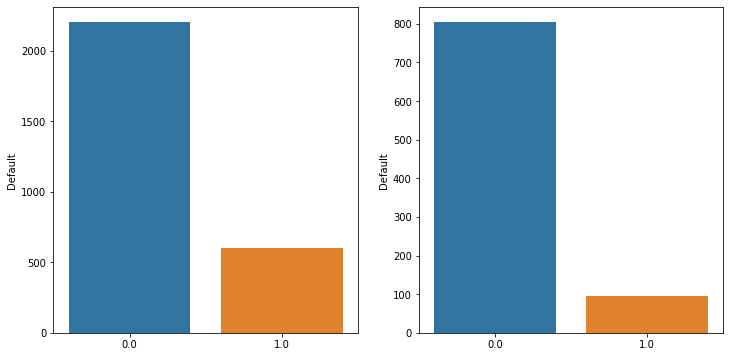

In [479]:
plt.figure(figsize=(12,6))
plt.subplot(121)
dtablefortrain = train.Default.value_counts() #違約與未違約比例
sns.barplot(dtablefortrain.index, dtablefortrain)
plt.subplot(122)
dtablefortest = test.Default.value_counts() 
sns.barplot(dtablefortest.index, dtablefortest)

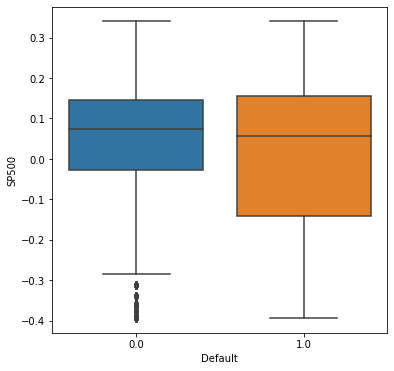

In [459]:
plt.figure(figsize=(6,6))
sns.boxplot("Default" , "SP500" ,data = comp) #違約與未違約公司總體環境素質

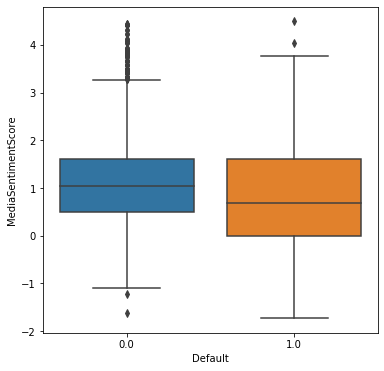

In [460]:
plt.figure(figsize=(6,6))
sns.boxplot("Default" , "MediaSentimentScore" ,data = comp) #違約與未違約公司媒體情指標

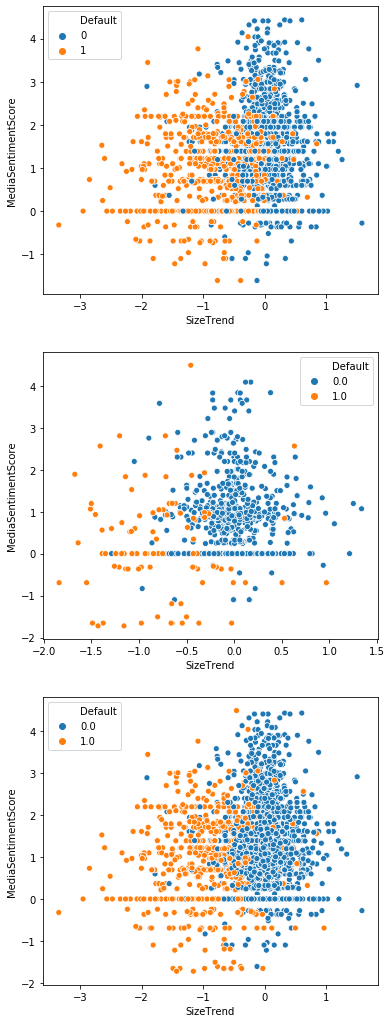

In [461]:
plt.figure(figsize=(6,18))
plt.subplot(311)
sns.scatterplot("SizeTrend", "MediaSentimentScore","Default",data=train) #公司成長趨勢與媒體情感指標
plt.subplot(312)
sns.scatterplot("SizeTrend", "MediaSentimentScore","Default",data=test)
plt.subplot(313)
sns.scatterplot("SizeTrend", "MediaSentimentScore","Default",data=comp)

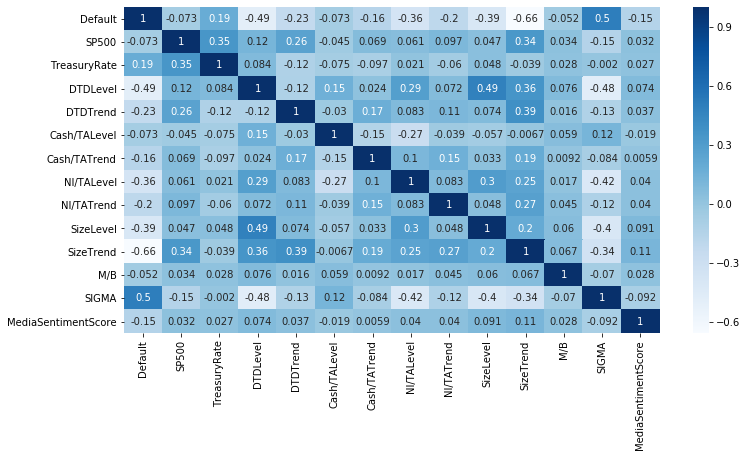

In [462]:
cor = train.iloc[:,1:].corr() #各變數相關性
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Blues',annot=True)